This notebook analyses the reasons for failure in the 2- and 3-post tasks

In [1]:
import sys,os
os.chdir(globals()['_dh'][0])
os.chdir("../")
BaseDirectory = os.getcwd()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import DataHandler
import importlib
importlib.reload(DataHandler)

from DataHandler import *

# 2-Post Task

In [2]:
p2_stuck = Data(BaseDirectory,maxP=2,popidx=10,perm=[0])
p2_stuck.LoadAllPlotData()

Behaviour in Phase 3 for 4 Permmutations

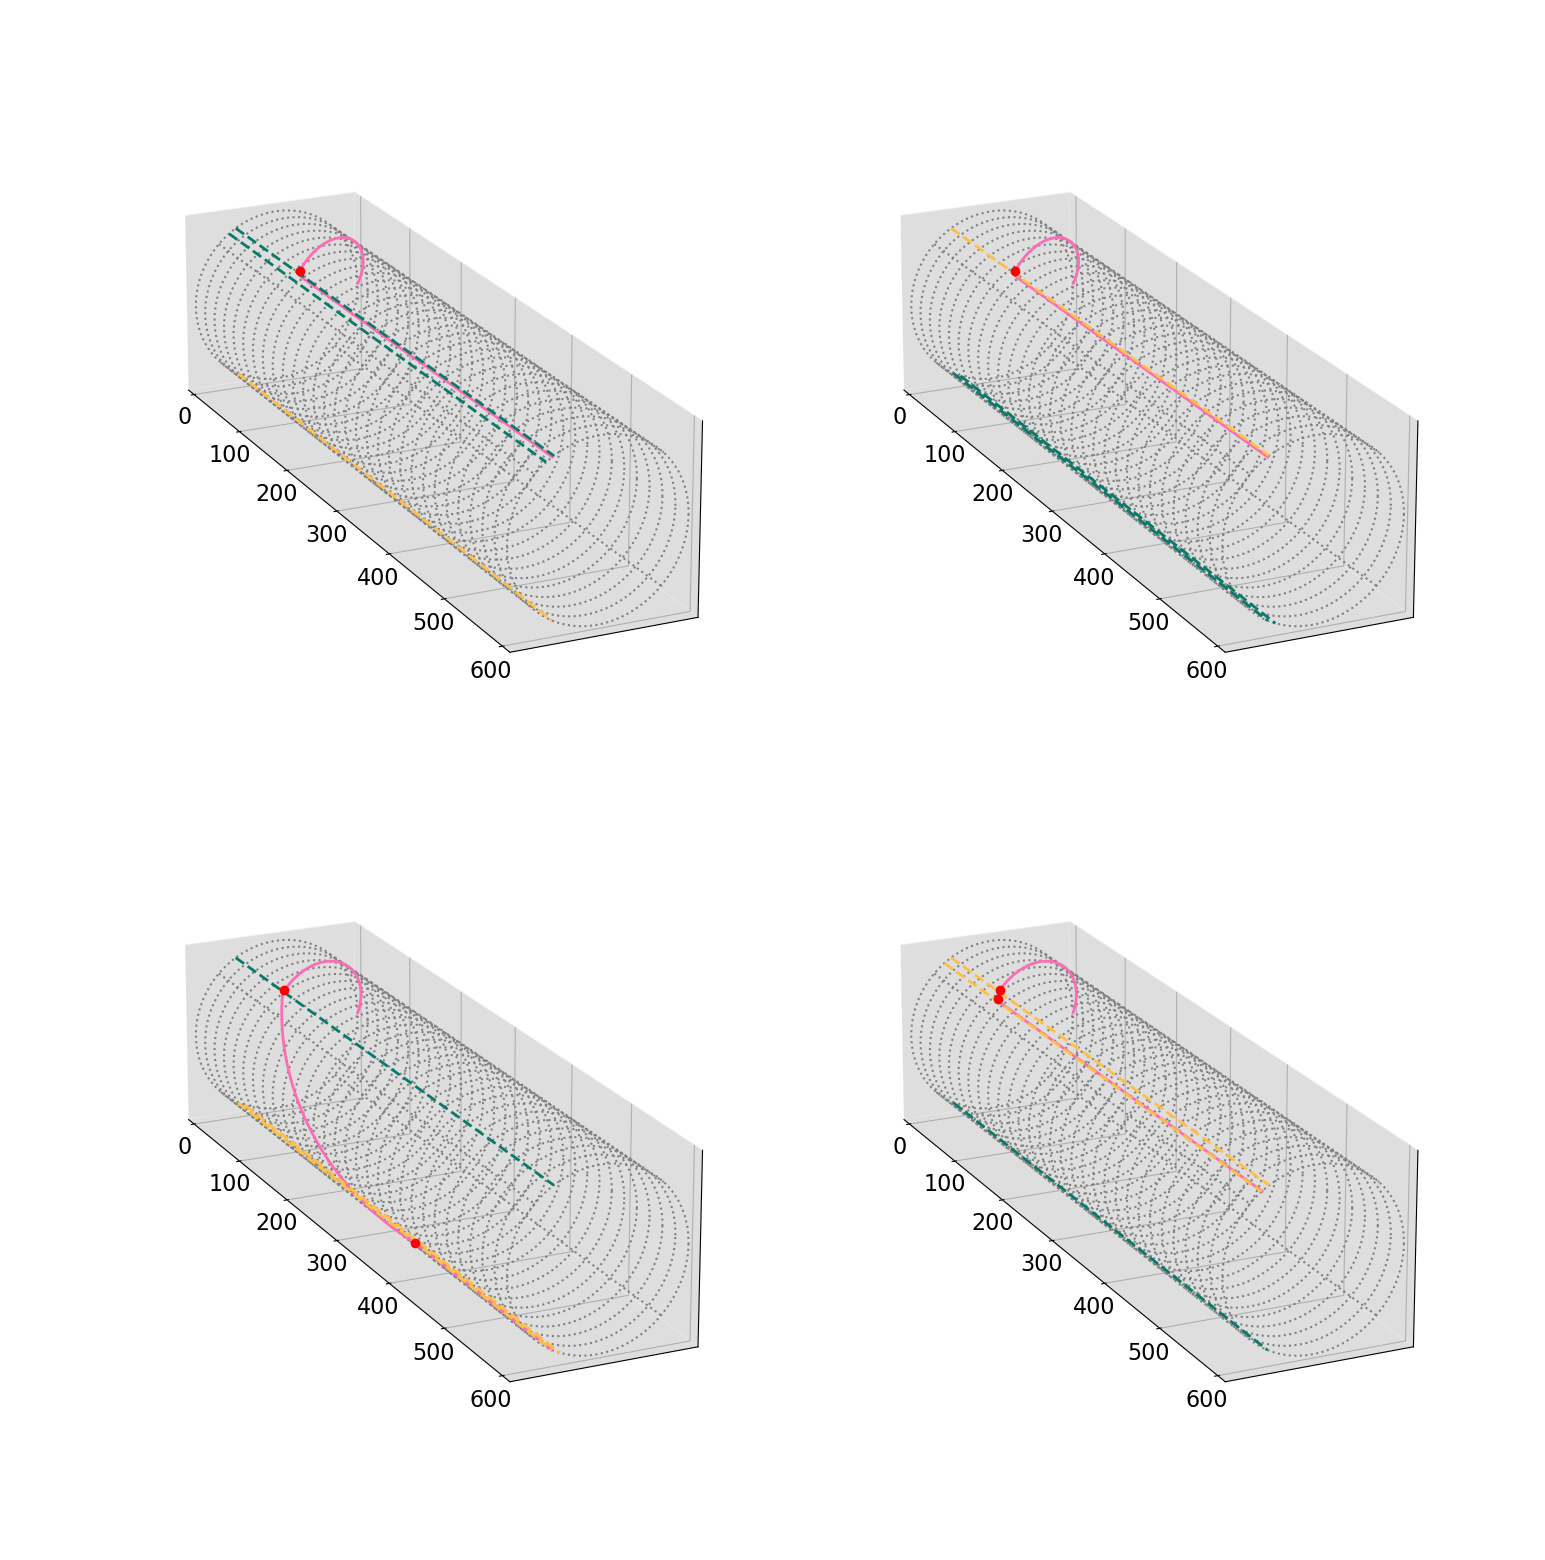

In [3]:
# phase 3 position plots for 4 permutations

fig = plt.figure(figsize=(40,20))

for i in range(4):
    ax = fig.add_subplot(2,2,i+1,projection="3d")
    ax.set_xlim([0,600])
    ax.set_xticks(np.arange(0,601,100))
    ax.tick_params(labelsize=16,pad=10)
    ax = ClearGrid(ax)
    ax = p2_stuck.PlotScaffold(ax,n=30)
    ax = p2_stuck.PlotReceiverPosition3D(ax,perm=i+1,phase=3)
    ax = p2_stuck.PlotPosts3D(ax,perm=i+1,phase=3)
    ax = p2_stuck.PlotContact3D(ax,perm=i+1,phase=3)
    ax.set_box_aspect(aspect=[1,.25,.25])
    ax.view_init(elev=20,azim=-25)
h,l = ax.get_legend_handles_labels()

fig.subplots_adjust(wspace=-.7,hspace=-.1)

# os.chdir(BaseDirectory)
# fig.savefig('./Plots/P2-stuck_pos.pdf',format="pdf",bbox_inches="tight",dpi=600)
# fig.savefig('./Plots/P2-stuck_pos.jpeg',bbox_inches="tight",dpi=600)
plt.show()

Receiver Activation in 2 Target Condition

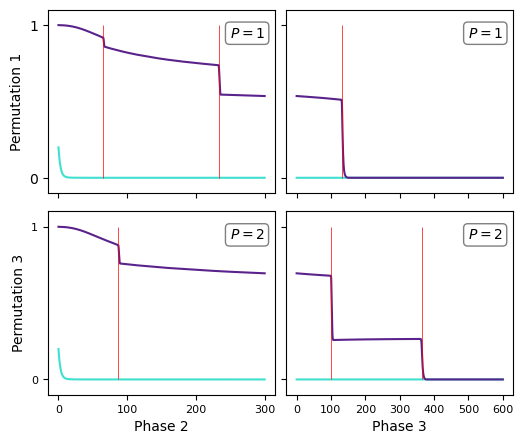

In [4]:
# receiver activation for 2 permutations

fig,axs = plt.subplots(2,2,sharey="all",sharex="col",figsize=[6,5])

n = [1,2] # select neurons to plot
perm = 1
axs[0,0] = p2_stuck.PlotReceiverActivation(axs[0,0],perm=perm,phase=2,n=n)
# contact points
axs[0,0].vlines(p2_stuck.ContactPoints2D[perm-1][1].get_path().vertices[:,0],0,1,colors="r",linewidth=.5)
axs[0,1] = p2_stuck.PlotReceiverActivation(axs[0,1],perm=perm,phase=3,n=n)
axs[0,1].vlines(p2_stuck.ContactPoints2D[perm-1][2].get_path().vertices[:,0],0,1,colors="r",linewidth=.5,label="Contact")
axs[0,0].autoscale()
axs[0,1].autoscale()

perm = 3
axs[1,0] = p2_stuck.PlotReceiverActivation(axs[1,0],perm=perm,phase=2,n=n)
axs[1,0].vlines(p2_stuck.ContactPoints2D[perm-1][1].get_path().vertices[:,0],0,1,colors="r",linewidth=.5)
axs[1,1] = p2_stuck.PlotReceiverActivation(axs[1,1],perm=perm,phase=3,n=n)
axs[1,1].vlines(p2_stuck.ContactPoints2D[perm-1][2].get_path().vertices[:,0],0,1,colors="r",linewidth=.5)
axs[1,0].autoscale()
axs[1,1].autoscale()

axs[0,0].set_ylim([-.1,1.1])
axs[0,0].set_yticks([0,1])
axs[0,0].set_xticks(np.arange(0,301,100))
axs[0,1].set_xticks(np.arange(0,601,100))
axs[1,0].tick_params(labelsize=8)
axs[1,1].tick_params(labelsize=8)

# labeling target condition
bbox = dict(boxstyle='round', fc='1', ec="0", alpha=.5)
axs[0,0].text(.8,.85,"$P=1$",transform=axs[0,0].transAxes,bbox=bbox)
axs[0,1].text(.8,.85,"$P=1$",transform=axs[0,1].transAxes,bbox=bbox)
axs[1,0].text(.8,.85,"$P=2$",transform=axs[1,0].transAxes,bbox=bbox)
axs[1,1].text(.8,.85,"$P=2$",transform=axs[1,1].transAxes,bbox=bbox)
axs[1,0].set_xlabel("Phase 2",fontsize=10)
axs[1,1].set_xlabel("Phase 3",fontsize=10)
axs[0,0].set_ylabel("Permutation 1",fontsize=10)
axs[1,0].set_ylabel("Permutation 3",fontsize=10)
plt.subplots_adjust(hspace=.1,wspace=.05)

# os.chdir(BaseDirectory)
# fig.savefig('./Plots/P2-stuck_act.pdf',format="pdf",bbox_inches="tight",dpi=600)
# fig.savefig('./Plots/P2-stuck_act.jpeg',bbox_inches="tight",dpi=600)
plt.show()

# receiver never learns to distinguish target posts.
# the basic strategy is: stop at third interaction.

# 3-Post Task

In [5]:
# loading in performance data to find best agent

os.chdir(BaseDirectory)
os.chdir("./AllData")

perf_low = []
perf_avg = []
os.chdir("./EvoP3_1")
for a in range(32):
    os.chdir("./Pop-"+str(a+1)+"/robust")
    fit = np.loadtxt("P3-RPF-01.dat",dtype=float,delimiter=" ",skiprows=32,max_rows=1)
    perf_low.append(fit[0])
    perf_avg.append(fit[1])
    os.chdir("../../")
os.chdir("../")

# NOTE: Analysis of population performance is in "Performance-Analysis.ipynb"

In [8]:
idx = np.where(perf_avg==max(perf_avg))[0][0] + 1

# takes ~90s to evaluate
p3_stuck = Data(BaseDirectory,maxP=3,popidx=idx,perm=[0],batchidx=1)
p3_stuck.LoadAllPlotData()

print(p3_stuck.FitnessVector)
print(p3_stuck.TotalFitness)

[1.       1.       1.       1.       0.100348 1.       1.       1.
 0.110041 1.       1.       1.      ]
0.850866


Interactions with $P=3$

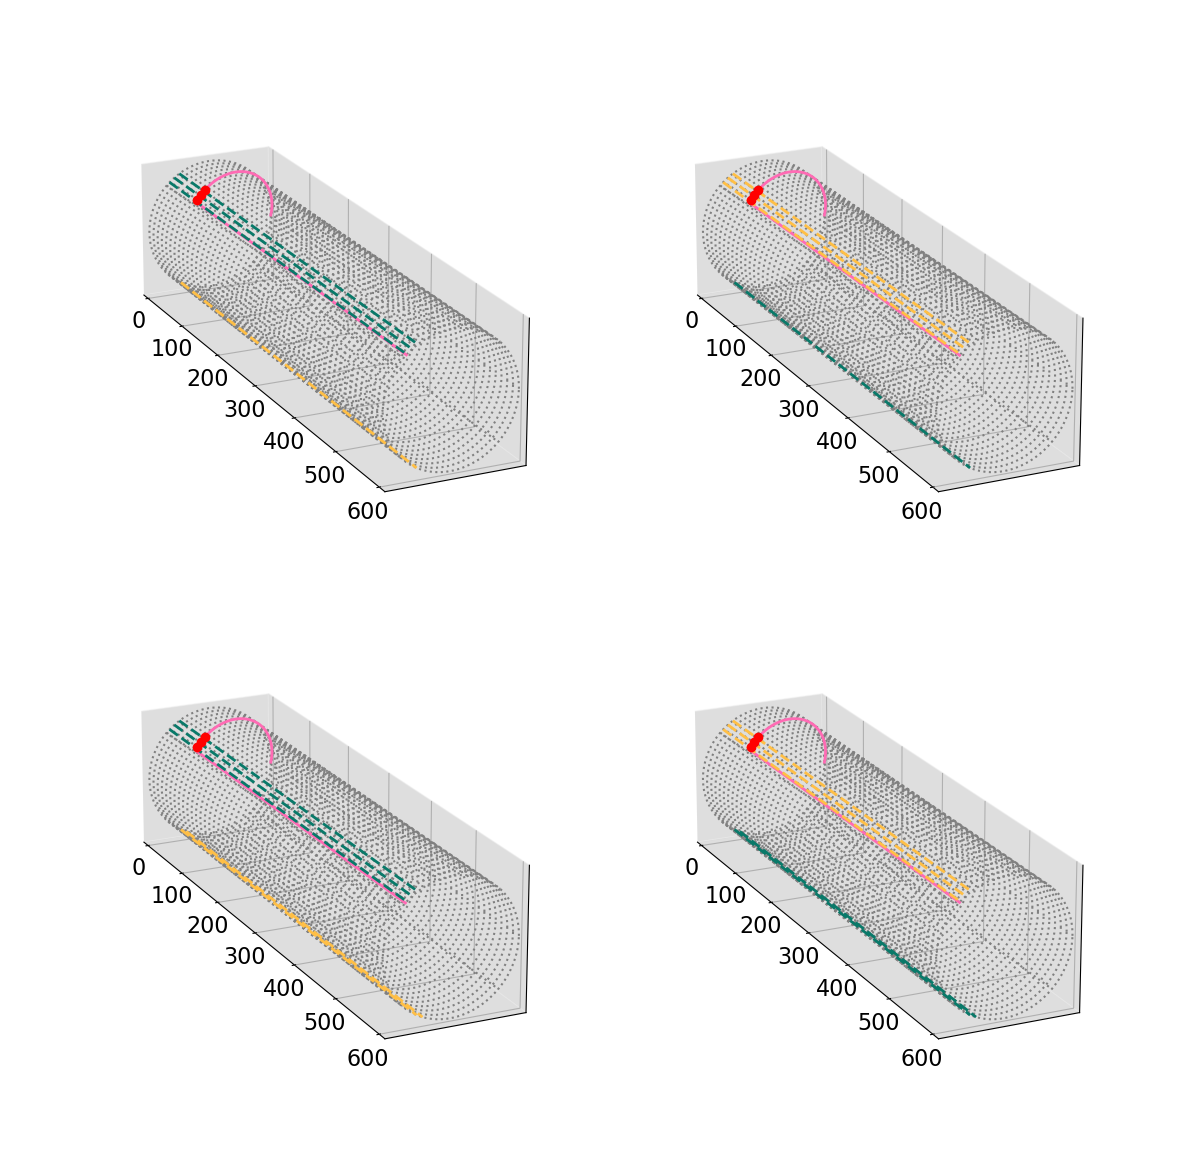

In [9]:
# permutations with P=3 as first interaction

fig = plt.figure(figsize=(25,15))

perm = [5,8,9,12]
for i in range(len(perm)):
    ax = fig.add_subplot(2,2,i+1,projection="3d")
    ax.set_xlim([0,600])
    ax.set_xticks(np.arange(0,601,100))
    ax.tick_params(labelsize=16,pad=10)
    ax = ClearGrid(ax)
    ax = p3_stuck.PlotScaffold(ax,n=50)
    ax = p3_stuck.PlotReceiverPosition3D(ax,perm=perm[i],phase=3)
    ax = p3_stuck.PlotPosts3D(ax,perm=perm[i],phase=3)
    ax = p3_stuck.PlotContact3D(ax,perm=perm[i],phase=3)
    ax.view_init(elev=20,azim=-25)
    ax.set_box_aspect(aspect=[1,.25,.25])

fig.subplots_adjust(wspace=-.6,hspace=-.1)

# os.chdir(BaseDirectory)
# fig.savefig('./Plots/P3-stuck_pos.pdf',format="pdf",bbox_inches="tight",dpi=600)
# fig.savefig('./Plots/P3-stuck_pos.jpeg',bbox_inches="tight",dpi=600)
plt.show()

Receiver Activation for 2 Target Conditions

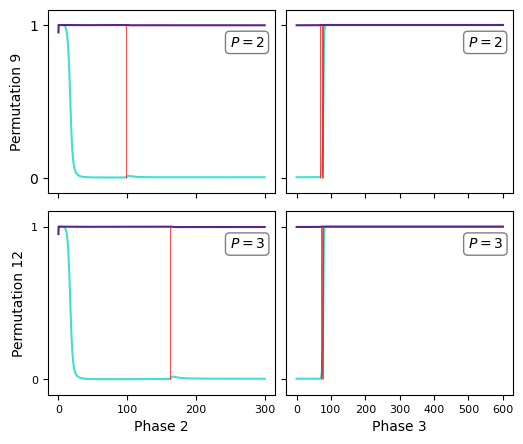

In [10]:
# receiver phases 2 and 3 for two target conditions and P=3 interaction

fig,axs = plt.subplots(2,2,sharey="all",sharex="col",figsize=[6,5])

n = [1,2]
perm = 9
axs[0,0] = p3_stuck.PlotReceiverActivation(axs[0,0],perm=perm,phase=2,n=n)
axs[0,0].vlines(p3_stuck.ContactPoints2D[perm-1][1].get_path().vertices[:,0],0,1,colors="r",linewidth=.5)
axs[0,1] = p3_stuck.PlotReceiverActivation(axs[0,1],perm=perm,phase=3,n=n)
axs[0,1].vlines(p3_stuck.ContactPoints2D[perm-1][2].get_path().vertices[:,0],0,1,colors="r",linewidth=.5,label="Contact")
axs[0,0].autoscale()
axs[0,1].autoscale()

perm = 12
axs[1,0] = p3_stuck.PlotReceiverActivation(axs[1,0],perm=perm,phase=2,n=n)
axs[1,0].vlines(p3_stuck.ContactPoints2D[perm-1][1].get_path().vertices[:,0],0,1,colors="r",linewidth=.5)
axs[1,1] = p3_stuck.PlotReceiverActivation(axs[1,1],perm=perm,phase=3,n=n)
axs[1,1].vlines(p3_stuck.ContactPoints2D[perm-1][2].get_path().vertices[:,0],0,1,colors="r",linewidth=.5)
axs[1,0].autoscale()
axs[1,1].autoscale()

axs[0,0].set_ylim([-.1,1.1])
axs[0,0].set_yticks([0,1])
axs[0,0].set_xticks(np.arange(0,301,100))
axs[0,1].set_xticks(np.arange(0,601,100))
axs[1,0].tick_params(labelsize=8)
axs[1,1].tick_params(labelsize=8)
bbox = dict(boxstyle='round', fc='1', ec="0", alpha=.5)
axs[0,0].text(.8,.8,"$P=2$",transform=axs[0,0].transAxes,bbox=bbox)
axs[0,1].text(.8,.8,"$P=2$",transform=axs[0,1].transAxes,bbox=bbox)
axs[1,0].text(.8,.8,"$P=3$",transform=axs[1,0].transAxes,bbox=bbox)
axs[1,1].text(.8,.8,"$P=3$",transform=axs[1,1].transAxes,bbox=bbox)
axs[0,0].set_ylabel("Permutation 9",fontsize=10)
axs[1,0].set_ylabel("Permutation 12",fontsize=10)
axs[1,0].set_xlabel("Phase 2",fontsize=10)
axs[1,1].set_xlabel("Phase 3",fontsize=10)
fig.subplots_adjust(wspace=.05,hspace=.1)

# os.chdir(BaseDirectory)
# fig.savefig('./Plots/P3-r-stuck_act.pdf',format="pdf",bbox_inches="tight",dpi=600)
# fig.savefig('./Plots/P3-r-stuck_act.jpeg',bbox_inches="tight",dpi=600)
plt.show()

# receiver can't distinguish P=2 and P=3

Sender Activation for 2 Target Conditions

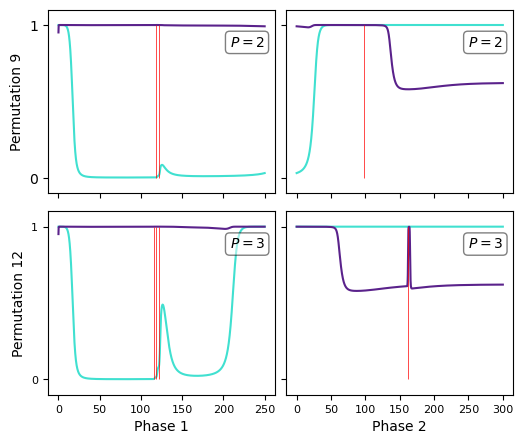

In [11]:
# sender distinction between P=1 and P=2

fig,axs = plt.subplots(2,2,sharey="all",sharex="col",figsize=[6,5])

n = [1,2]
perm = 9
axs[0,0] = p3_stuck.PlotSenderActivation(axs[0,0],perm=perm,phase=1,n=n)
axs[0,0].vlines(p3_stuck.ContactPoints2D[perm-1][0].get_path().vertices[:,0],0,1,colors="r",linewidth=.5)
axs[0,1] = p3_stuck.PlotSenderActivation(axs[0,1],perm=perm,phase=2,n=n)
axs[0,1].vlines(p3_stuck.ContactPoints2D[perm-1][1].get_path().vertices[:,0],0,1,colors="r",linewidth=.5,label="Contact")
axs[0,0].autoscale()
axs[0,1].autoscale()

perm = 12
axs[1,0] = p3_stuck.PlotSenderActivation(axs[1,0],perm=perm,phase=1,n=n)
axs[1,0].vlines(p3_stuck.ContactPoints2D[perm-1][0].get_path().vertices[:,0],0,1,colors="r",linewidth=.5)
axs[1,1] = p3_stuck.PlotSenderActivation(axs[1,1],perm=perm,phase=2,n=n)
axs[1,1].vlines(p3_stuck.ContactPoints2D[perm-1][1].get_path().vertices[:,0],0,1,colors="r",linewidth=.5)
axs[1,0].autoscale()
axs[1,1].autoscale()

axs[0,0].set_ylim([-.1,1.1])
axs[0,0].set_yticks([0,1])
axs[0,0].set_xticks(np.arange(0,251,50))
axs[0,1].set_xticks(np.arange(0,301,50))
axs[1,0].tick_params(labelsize=8)
axs[1,1].tick_params(labelsize=8)
bbox = dict(boxstyle='round', fc='1', ec="0", alpha=.5)
axs[0,0].text(.8,.8,"$P=2$",transform=axs[0,0].transAxes,bbox=bbox)
axs[0,1].text(.8,.8,"$P=2$",transform=axs[0,1].transAxes,bbox=bbox)
axs[1,0].text(.8,.8,"$P=3$",transform=axs[1,0].transAxes,bbox=bbox)
axs[1,1].text(.8,.8,"$P=3$",transform=axs[1,1].transAxes,bbox=bbox)
axs[0,0].set_ylabel("Permutation 9",fontsize=10)
axs[1,0].set_ylabel("Permutation 12",fontsize=10)
axs[1,0].set_xlabel("Phase 1",fontsize=10)
axs[1,1].set_xlabel("Phase 2",fontsize=10)

fig.subplots_adjust(wspace=.05,hspace=.1)

# os.chdir(BaseDirectory)
# fig.savefig('./Plots/P3-s-stuck_act.pdf',format="pdf",bbox_inches="tight",dpi=600)
# fig.savefig('./Plots/P3-s-stuck_act.jpeg',bbox_inches="tight",dpi=600)
plt.show()

# sender fails to make sufficient distinction